In [45]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report



In [46]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
print(df.head())
print(df.info())
print(df.describe())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [47]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [48]:
print("Obesity Level Counts:",df['NObeyesdad'].value_counts())

Obesity Level Counts: NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


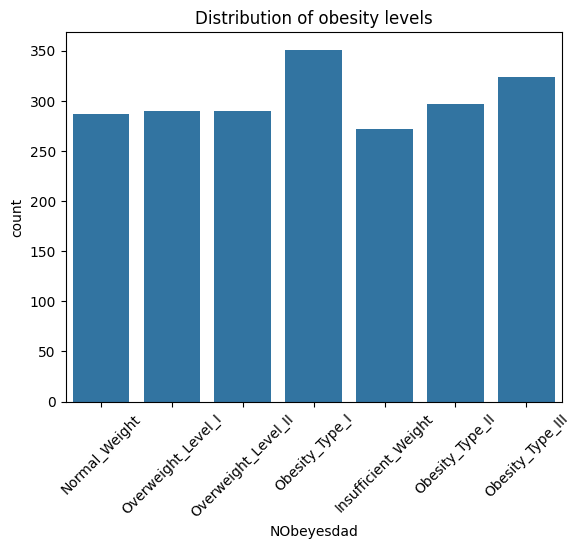

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [49]:
sns.countplot(x='NObeyesdad',data=df)
plt.title("Distribution of obesity levels")
plt.xticks(rotation=45)
plt.show()
print(df.columns)


In [50]:
# 2️⃣ Handle binary yes/no columns
binary_cols = ['family_history_with_overweight','FAVC','SMOKE','CALC','SCC']
for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})
    df[col].fillna(0, inplace=True)  # missing -> 0

# 3️⃣ Encode multi-class categorical columns using one-hot
multi_class_cols = ['CAEC','MTRANS']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# 4️⃣ Encode Gender (binary)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# 5️⃣ Fill missing numeric columns
numeric_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

print(df.columns)
print(df.head())

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'NObeyesdad', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  TUE  CALC           NObeyesdad  CAEC_Frequently  \
0  3.0      0   2.0  ...  1.0   0.0        Normal_Weight            False   
1  3.0      1   3.0  ...  

In [53]:
bool_cols = ['CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
             'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']

for col in bool_cols:
    df[col] = df[col].astype(int)  # True → 1, False → 0
numeric_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

print(df.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  TUE  CALC           NObeyesdad  CAEC_Frequently  \
0  3.0      0   2.0  ...  1.0   0.0        Normal_Weight                0   
1  3.0      1   3.0  ...  0.0   0.0        Normal_Weight                0   
2  3.0      0   2.0  ...  1.0   0.0        Normal_Weight                0   
3  3.0      0   2.0  ...  0.0   0.0   Overweight_Level_I                0   
4  1.0      0   2.0  ...  0.0   0.0  Overweight_Level_II                0   

  CAEC_Sometimes  CAEC_no  MTRANS_Bike  MTRANS_Motorbike  \
0 

In [55]:
#BMI is the target value for regression model
df['BMI']=df['Weight']/(df['Height']**2)


X_reg=df.drop(['BMI','NObeyesdad'],axis=1)
y_reg=df['BMI']

X_class=df.drop(['BMI','NObeyesdad'],axis=1)
y_class=df['NObeyesdad']

print("Regression Feature shape:",X_reg.shape)
print("Classification Feature shape:",X_class.shape)
print(df.head())


Regression Feature shape: (2111, 21)
Classification Feature shape: (2111, 21)
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  CALC           NObeyesdad  CAEC_Frequently  \
0  3.0      0   2.0  ...   0.0        Normal_Weight                0   
1  3.0      1   3.0  ...   0.0        Normal_Weight                0   
2  3.0      0   2.0  ...   0.0        Normal_Weight                0   
3  3.0      0   2.0  ...   0.0   Overweight_Level_I                0   
4  1.0      0   2.0  ...   0.0  Overweight_Level_II                0   

   CAEC_Someti

In [65]:
scaler=StandardScaler()
X_reg_scaled=scaler.fit_transform(X_reg)
X_class_scaled=scaler.fit_transform(X_class)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [57]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=42
)


In [59]:
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}
regression_models

{'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Random Forest': RandomForestRegressor(random_state=42)}

In [60]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
classification_models

{'Logistic Regression': LogisticRegression(max_iter=1000),
 'KNN': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42)}

In [66]:
reg_scores = {}

for name, model in regression_models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    reg_scores[name] = {
        "MAE": mean_absolute_error(y_test_reg, y_pred),
        "R2": r2_score(y_test_reg, y_pred),
        "model": model
    }
print("----- Regression Model Performance -----")
for name, scores in reg_scores.items():
    print(f"{name} -> MAE: {scores['MAE']:.4f}, R2: {scores['R2']:.4f}")

class_scores = {}

for name, model in classification_models.items():
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    class_scores[name] = {
        "Accuracy": accuracy_score(y_test_class, y_pred),
        "F1": f1_score(y_test_class, y_pred, average='weighted'),
        "model": model
    }
print("\n----- Classification Model Performance -----")
for name, scores in class_scores.items():
    print(f"{name} -> Accuracy: {scores['Accuracy']:.4f}, F1: {scores['F1']:.4f}")



----- Regression Model Performance -----
Linear Regression -> MAE: 0.5780, R2: 0.9912
Decision Tree -> MAE: 0.3802, R2: 0.9936
Random Forest -> MAE: 0.2732, R2: 0.9970

----- Classification Model Performance -----
Logistic Regression -> Accuracy: 0.8794, F1: 0.8778
KNN -> Accuracy: 0.7849, F1: 0.7781
Decision Tree -> Accuracy: 0.9456, F1: 0.9457
Random Forest -> Accuracy: 0.9527, F1: 0.9529


In [69]:
import joblib
best_reg_model_name = min(reg_scores, key=lambda x: reg_scores[x]["MAE"])
best_reg_model = reg_scores[best_reg_model_name]["model"]
print("Best Regression Model:", best_reg_model_name,"with Lowest MAE among all model", reg_scores["Random Forest"]["MAE"])
print(".....Model with low MAE is best for regression.....")
joblib.dump(best_reg_model, "best_reg_model.pkl")


Best Regression Model: Random Forest with Lowest MAE among all model 0.27319101269750745
.....Model with low MAE is best for regression.....


['best_reg_model.pkl']

In [70]:
best_class_model_name = max(class_scores, key=lambda x: class_scores[x]["F1"])
best_class_model = class_scores[best_class_model_name]["model"]
print("Best Classification Model:", best_class_model_name,"with highest accuracy score among all model",class_scores["Random Forest"]["Accuracy"])
print(".....Model with high accuracy score is best model for classification.....")
joblib.dump(best_class_model, "best_class_model.pkl")


Best Classification Model: Random Forest with highest accuracy score among all model 0.9527186761229315
.....Model with high accuracy score is best model for classification.....


['best_class_model.pkl']

In [72]:
# Example user input
user_input = [[25, 1.70, 70, 1, 2, 3, 2, 1, 2, 1,4,2,1,22,13,12,3,1,2,3,4]]  # Numeric features

# Load models
best_reg = joblib.load("best_reg_model.pkl")
best_class = joblib.load("best_class_model.pkl")
scaler = joblib.load("scaler.pkl")

# Scale input
user_scaled = scaler.transform(user_input)

# Predict
bmi_pred = best_reg.predict(user_scaled)[0]
obesity_pred = best_class.predict(user_scaled)[0]

print(f"Predicted BMI: {bmi_pred:.2f}")
print(f"Predicted Obesity Level: {obesity_pred}")


Predicted BMI: 14.49
Predicted Obesity Level: Normal_Weight


/home/intellact/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
#checking whether both app.py and train.py have same number of values
print(len(df.drop("NObeyesdad", axis=1).columns))


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'BMI'],
      dtype='object')
22
